# Authentication with Spotify API

In [23]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
#sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='<your client id here>',
#                                                           client_secret='<your client secret here>'))

In [24]:
# creating secrets
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [25]:
# authentication with secrets

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

# Get data from API

In [26]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        print('some results loaded')
        sleep(randint(1,3))
    return tracks

In [27]:
all_tracks = get_playlist_tracks("3LgwHwHUnheGm88n8pDdA7")
len(all_tracks)

11

In [28]:
# all_tracks

In [29]:
playlist = sp.user_playlist_tracks("spotify", "3LgwHwHUnheGm88n8pDdA7")

In [30]:
#THIS FUNCTION WILL BE USED AGAIN!
def get_name_artists_from_track(track):
    return [(track["name"],artist["name"]) for artist in track["artists"]]

In [31]:
get_name_artists_from_track(all_tracks[0]['track'])

[("Livin' On A Prayer", 'Bon Jovi')]

In [32]:
#first we need to get a list of individual tracks from the playlist
def get_name_artist_from_playlist_item(playlist_item):
    return get_name_artists_from_track(playlist_item['track'])

In [33]:
get_name_artist_from_playlist_item(all_tracks[0])

[("Livin' On A Prayer", 'Bon Jovi')]

In [34]:
def get_name_artists_from_playlist(input_playlist):
    return list(map(get_name_artist_from_playlist_item,input_playlist["items"]))

In [35]:
# all_tracks[0]

In [36]:
song_artist = get_name_artists_from_playlist(playlist)

In [37]:
song_artist = [song_artist[i][0] for i in range(len(song_artist))]

In [38]:
song_artist

[("Livin' On A Prayer", 'Bon Jovi'),
 ('Wishing on a Star', 'Rose Royce'),
 ('Supremacy', 'Muse'),
 ('Saturday Night - Radio Mix', 'Whigfield'),
 ('The Real Slim Shady', 'Eminem'),
 ('The Cutter', 'Echo & the Bunnymen'),
 ('Schunder-Song', 'Die Ärzte'),
 ('Still D.R.E.', 'Dr. Dre'),
 ('Dreamer', 'Supertramp'),
 ('Feel My Love', 'KK'),
 ('Mi Estrella Blanca', 'Fondo Flamenco')]

# Creating the Dataframe

In [39]:
import pandas as pd
df = pd.DataFrame(song_artist, columns = ['track_name', 'artist_name'])

In [40]:
df

,track_name,artist_name
0,Livin' On A Prayer,Bon Jovi
1,Wishing on a Star,Rose Royce
2,Supremacy,Muse
3,Saturday Night - Radio Mix,Whigfield
4,The Real Slim Shady,Eminem
5,The Cutter,Echo & the Bunnymen
6,Schunder-Song,Die Ärzte
7,Still D.R.E.,Dr. Dre
8,Dreamer,Supertramp
9,Feel My Love,KK


In [41]:
df['track_id'] = [(all_tracks[i]['track']['uri']) for i in range(len(all_tracks))]

In [42]:
df = df[['artist_name', 'track_id', 'track_name']]

In [43]:
df

,artist_name,track_id,track_name
0,Bon Jovi,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer
1,Rose Royce,spotify:track:0u2CGItUO2jYEiFaXD7n5S,Wishing on a Star
2,Muse,spotify:track:40pPI2TbaYSZlKfV44HRjn,Supremacy
3,Whigfield,spotify:track:59VRFpPnC8pOhIH2WCWXF9,Saturday Night - Radio Mix
4,Eminem,spotify:track:3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady
5,Echo & the Bunnymen,spotify:track:1uquUeoieXGKOyuHfjWWdS,The Cutter
6,Die Ärzte,spotify:track:2OLPgRjanLolNsJLkI3cms,Schunder-Song
7,Dr. Dre,spotify:track:503OTo2dSqe7qk76rgsbep,Still D.R.E.
8,Supertramp,spotify:track:5z4ljpMLi1LTF8UG9P53fH,Dreamer
9,KK,spotify:track:4EjO3ELtQkbOBox5adad6a,Feel My Love


In [44]:
features = [sp.audio_features(i) for i in df['track_id']]

In [45]:
df2 = pd.DataFrame(features[0])

In [46]:
for i in range(len(features)):
    if i == 0: continue
    df2 = df2.append(pd.DataFrame(features[i]),ignore_index=True)

In [47]:
df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000214,0.2940,0.795,122.511,audio_features,37ZJ0p5Jm13JPevGcx4SkF,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,https://api.spotify.com/v1/tracks/37ZJ0p5Jm13J...,https://api.spotify.com/v1/audio-analysis/37ZJ...,249293,4
1,0.333,0.422,5,-15.171,0,0.0527,0.71600,0.000041,0.0455,0.553,97.305,audio_features,0u2CGItUO2jYEiFaXD7n5S,spotify:track:0u2CGItUO2jYEiFaXD7n5S,https://api.spotify.com/v1/tracks/0u2CGItUO2jY...,https://api.spotify.com/v1/audio-analysis/0u2C...,291760,4
2,0.256,0.679,9,-4.495,0,0.0387,0.00451,0.040900,0.1720,0.325,158.718,audio_features,40pPI2TbaYSZlKfV44HRjn,spotify:track:40pPI2TbaYSZlKfV44HRjn,https://api.spotify.com/v1/tracks/40pPI2TbaYSZ...,https://api.spotify.com/v1/audio-analysis/40pP...,295373,4
3,0.728,0.784,11,-11.776,1,0.0379,0.04490,0.091800,0.0964,0.964,129.981,audio_features,59VRFpPnC8pOhIH2WCWXF9,spotify:track:59VRFpPnC8pOhIH2WCWXF9,https://api.spotify.com/v1/tracks/59VRFpPnC8pO...,https://api.spotify.com/v1/audio-analysis/59VR...,247406,4
4,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,audio_features,3yfqSUWxFvZELEM4PmlwIR,spotify:track:3yfqSUWxFvZELEM4PmlwIR,https://api.spotify.com/v1/tracks/3yfqSUWxFvZE...,https://api.spotify.com/v1/audio-analysis/3yfq...,284200,4
5,0.471,0.955,7,-5.219,1,0.1210,0.00485,0.000001,0.1620,0.350,139.266,audio_features,1uquUeoieXGKOyuHfjWWdS,spotify:track:1uquUeoieXGKOyuHfjWWdS,https://api.spotify.com/v1/tracks/1uquUeoieXGK...,https://api.spotify.com/v1/audio-analysis/1uqu...,232746,4
6,0.490,0.951,0,-3.813,1,0.1780,0.00720,0.000074,0.1160,0.535,172.264,audio_features,2OLPgRjanLolNsJLkI3cms,spotify:track:2OLPgRjanLolNsJLkI3cms,https://api.spotify.com/v1/tracks/2OLPgRjanLol...,https://api.spotify.com/v1/audio-analysis/2OLP...,186773,4
7,0.816,0.775,11,-3.323,1,0.2340,0.16000,0.000310,0.0543,0.527,93.431,audio_features,503OTo2dSqe7qk76rgsbep,spotify:track:503OTo2dSqe7qk76rgsbep,https://api.spotify.com/v1/tracks/503OTo2dSqe7...,https://api.spotify.com/v1/audio-analysis/503O...,270587,4
8,0.664,0.414,5,-14.113,1,0.0675,0.86400,0.036700,0.0813,0.831,147.883,audio_features,5z4ljpMLi1LTF8UG9P53fH,spotify:track:5z4ljpMLi1LTF8UG9P53fH,https://api.spotify.com/v1/tracks/5z4ljpMLi1LT...,https://api.spotify.com/v1/audio-analysis/5z4l...,213236,4
9,0.746,0.697,7,-7.693,0,0.0422,0.01440,0.000746,0.1670,0.542,99.974,audio_features,4EjO3ELtQkbOBox5adad6a,spotify:track:4EjO3ELtQkbOBox5adad6a,https://api.spotify.com/v1/tracks/4EjO3ELtQkbO...,https://api.spotify.com/v1/audio-analysis/4EjO...,299893,4


In [48]:
df2 = df2[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]

In [49]:
df = pd.concat([df, df2], axis=1)

In [50]:
## Add popularity
#  later

In [51]:
df['popularity'] = 0

In [52]:
## Add data from kaggle

In [53]:
df_kaggle = pd.read_csv('spotifyfeatures.csv')
df_kaggle

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [54]:
df = pd.concat([df, df_kaggle], axis=0)

In [55]:
df.isnull().sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

# Clustering

In [61]:
X = df._get_numeric_data()
X.columns
y = pd.Series(df['track_name'])


In [62]:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X.columns).head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,-0.765804,-0.260266,0.297652,1.220821,-0.621084,-1.452237,0.590956,0.949961,0.803404,-0.631520,0.100691,0.235241,1.371580,-1.227935
1,1.080631,-1.307209,0.642490,-0.565518,-0.621563,-0.064393,-0.890607,-0.794168,-1.244704,-0.477084,-0.735068,0.235241,0.437514,-1.227935
2,-0.977846,-1.712307,0.671828,0.421770,-0.508166,1.045882,-0.136411,0.837190,-1.244704,-0.589694,1.301213,0.235241,-0.442516,-1.227935
3,-0.860990,0.770894,0.282329,0.825137,-0.366902,1.601020,-0.587140,-0.275391,0.803404,-0.596128,0.348375,0.235241,2.023883,-1.227935
4,-0.903520,1.933580,0.581101,0.352622,-0.621678,-0.064393,-0.891203,0.875544,-1.244704,-0.440888,-0.496370,0.235241,1.236488,-1.227935


In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [64]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    61150
1    42425
2    27099
dtype: int64

In [65]:
clusters

array([0, 2, 1, ..., 1, 1, 0])

In [66]:
df['cluster'] = clusters

In [67]:
df

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,cluster
0,Bon Jovi,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,Livin' On A Prayer,0.07780,0.532,249293,0.887,0.000214,0,0.2940,-3.757,1,0.0335,122.511,4,0.7950,0,0
1,Rose Royce,spotify:track:0u2CGItUO2jYEiFaXD7n5S,Wishing on a Star,0.71600,0.333,291760,0.422,0.000041,5,0.0455,-15.171,0,0.0527,97.305,4,0.5530,0,2
2,Muse,spotify:track:40pPI2TbaYSZlKfV44HRjn,Supremacy,0.00451,0.256,295373,0.679,0.040900,9,0.1720,-4.495,0,0.0387,158.718,4,0.3250,0,1
3,Whigfield,spotify:track:59VRFpPnC8pOhIH2WCWXF9,Saturday Night - Radio Mix,0.04490,0.728,247406,0.784,0.091800,11,0.0964,-11.776,1,0.0379,129.981,4,0.9640,0,0
4,Eminem,spotify:track:3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,0.03020,0.949,284200,0.661,0.000000,5,0.0454,-4.244,0,0.0572,104.504,4,0.7600,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.00678,0.601,190539,0.801,0.000000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57,0
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.91800,0.387,194583,0.249,0.000000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60,2
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.33000,0.717,139191,0.532,0.000000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47,1
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.00790,0.772,180013,0.510,0.000000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50,1


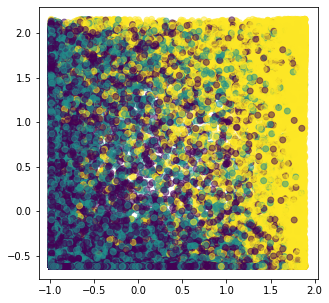

In [68]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 4], c=clusters,alpha=0.5)
plt.show()

In [69]:
%%time
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

1332752.4642459878
Wall time: 4.92 s


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

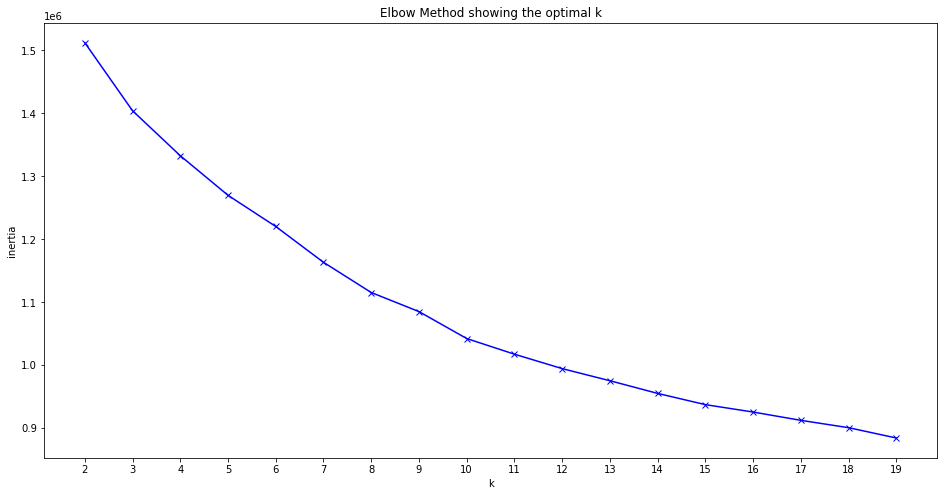

In [70]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

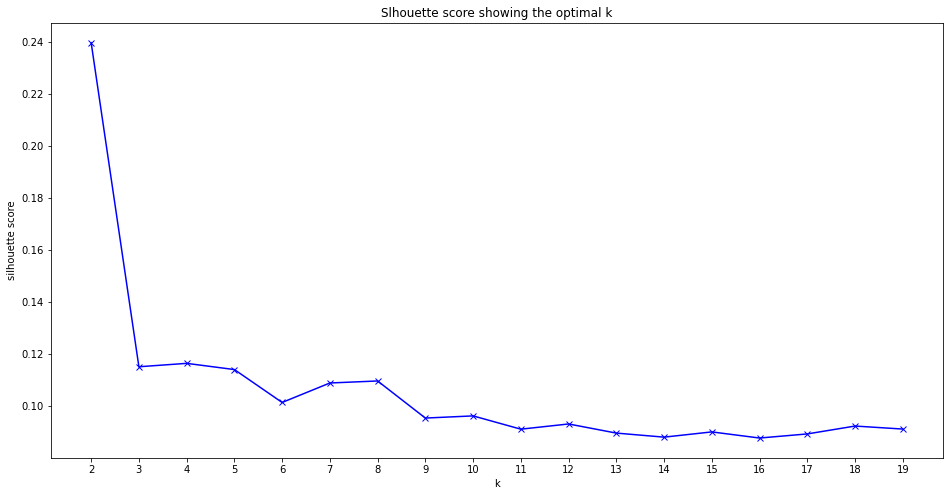

In [71]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')